# Music league data app

Fuck around with the league data. First load up the user data.

In [1]:
import numpy as np
import csv
# from math import max
from collections import defaultdict
from PIL import Image, ImageDraw 
import matplotlib.image as mpimg

class Person(object):
    def __init__(self, ID, Name):
        self.id = ID
        self.name = Name
        self.submissions = defaultdict(list)
        self.downvotes = defaultdict(list)
        self.votes = {}
        self.img = ''

    def mx(self):
        return max(self.votes.values())
    
    def add_sub(self, round, song):
        self.submissions[round].append(song)
        # print()

    def display_name(self):
        return "".join(w[0:2] for w in self.name.split())

    def __repr__(self):
        return '{}({})'.format(self.name, self.id)

def read_peeps(folder = '_data/raw'):
    peeps = {}
    with open('{}/competitors.csv'.format(folder)) as f:
        reader = csv.DictReader(f, delimiter=',')
        headers = reader.fieldnames
        for row in reader:
            peeps[row[headers[0]]] = Person(row[headers[0]], row[headers[1]])
        return peeps
    
def default_img(person):
    img = mpimg.imread('fotos/default.png')
    person.img = img

def circular_img(file):
    img = Image.open(file).convert('RGB')
    # img = img.resize((1000, 1000))
    h,w = img.size 
    lum_img = Image.new('L',[h,w] ,0)  
    draw = ImageDraw.Draw(lum_img) 
    draw.pieslice([(0,0),(h,w)],0,360,fill=255) 
    img_arr = np.array(img) 
    lum_img_arr = np.array(lum_img) 
    # return Image.fromarray(np.dstack((img_arr, lum_img_arr)))
    return np.dstack((img_arr, lum_img_arr))

In [2]:
# Combine sam data
sam_main = '58afd4f15f39489cb2ecbcd7895eb2f8'
sam_old = '9643787ed78f41bf86f4188aaf037f42'

import os


def consolidate_sam_data(folder = '_data/raw'):
    # Remove from competitors.csv
    comp_fname = '{}/{}.csv'.format(folder, 'competitors')
    comp_tmp_fname = '{}/{}_tmp.csv'.format(folder, 'competitors')
    with open(comp_fname, encoding="utf8") as in_file:
        reader = csv.DictReader(in_file, delimiter=',')

        with open(comp_tmp_fname, 'w', encoding="utf8") as out_file:
            writer = csv.DictWriter(out_file, reader.fieldnames, lineterminator = '\n')
            writer.writeheader()
            for row in reader:
                if row['ID'] != sam_old:
                    writer.writerow(row)

            writer.writerows(reader)
            out_file.close()

    os.remove(comp_fname)
    os.rename(comp_tmp_fname, comp_fname)

    sub_fname = '{}/{}.csv'.format(folder, 'submissions')
    sub_tmp_fname = '{}/{}_tmp.csv'.format(folder, 'submissions')
    # Handle submissions.csv
    with open(sub_fname, encoding="utf8") as in_file:
        reader = csv.DictReader(in_file, delimiter=',')

        with open(sub_tmp_fname, 'w', encoding="utf8") as out_file:
            writer = csv.DictWriter(out_file, reader.fieldnames, lineterminator = '\n')
            writer.writeheader()
            for row in reader:
                if row['Submitter ID'] == sam_old:
                    row['Submitter ID'] = sam_main
                writer.writerow(row)

            writer.writerows(reader)
            out_file.close()

    os.remove(sub_fname)
    os.rename(sub_tmp_fname, sub_fname)

    # Handle votes.csv
    votes_fname = '{}/{}.csv'.format(folder, 'votes')
    votes_tmp_fname = '{}/{}_tmp.csv'.format(folder, 'votes')
    with open(votes_fname, encoding="utf8") as in_file:
        reader = csv.DictReader(in_file, delimiter=',')

        with open(votes_tmp_fname, 'w', encoding="utf8") as out_file:
            writer = csv.DictWriter(out_file, reader.fieldnames, lineterminator = '\n')
            writer.writeheader()
            for row in reader:
                if row['Voter ID'] == sam_old:
                    row['Voter ID'] = sam_main
                writer.writerow(row)

            writer.writerows(reader)
            out_file.close()

        
    os.remove(votes_fname)
    os.rename(votes_tmp_fname, votes_fname)
    
consolidate_sam_data()

In [3]:
# # Drop glennon + luke

# def drop(name, folder = 'export'):
#     p = find_person(name)
#     if not p:
#         print('"{}" not found, cannot drop'.format(name))
#     else:
#         # Remove from competitors.csv
#         sub_fname = '{}/{}.csv'.format(folder, 'competitors')
#         sub_tmp_fname = '{}/{}_tmp.csv'.format(folder, 'competitors')
#         with open(sub_fname, encoding="utf8") as in_file:
#             reader = csv.DictReader(in_file, delimiter=',')

#             with open(sub_tmp_fname, 'w', encoding="utf8") as out_file:
#                 writer = csv.DictWriter(out_file, reader.fieldnames, lineterminator = '\n')
#                 writer.writeheader()
#                 for row in reader:
#                     if row['ID'] != p.id:
#                         writer.writerow(row)

#                 writer.writerows(reader)
#                 out_file.close()

#         os.remove(sub_fname.format(folder))
#         os.rename(sub_tmp_fname, sub_fname)

#         # Remove from submissions.csv
#         sub_fname = '{}/{}.csv'.format(folder, 'submissions')
#         sub_tmp_fname = '{}/{}_tmp.csv'.format(folder, 'submissions')
#         with open(sub_fname, encoding="utf8") as in_file:
#             reader = csv.DictReader(in_file, delimiter=',')

#             with open(sub_tmp_fname, 'w', encoding="utf8") as out_file:
#                 writer = csv.DictWriter(out_file, reader.fieldnames, lineterminator = '\n')
#                 writer.writeheader()
#                 for row in reader:
#                     if row['Submitter ID'] != p.id:
#                         writer.writerow(row)

#                 writer.writerows(reader)
#                 out_file.close()

#         os.remove(sub_fname.format(folder))
#         os.rename(sub_tmp_fname, sub_fname)

#         # Handle votes.csv
#         votes_fname = '{}/{}.csv'.format(folder, 'votes')
#         votes_tmp_fname = '{}/{}_tmp.csv'.format(folder, 'votes')
#         with open(votes_fname, encoding="utf8") as in_file:
#             reader = csv.DictReader(in_file, delimiter=',')

#             with open(votes_tmp_fname, 'w', encoding="utf8") as out_file:
#                 writer = csv.DictWriter(out_file, reader.fieldnames, lineterminator = '\n')
#                 writer.writeheader()
#                 for row in reader:
#                     if row['Voter ID'] != p.id:
#                         writer.writerow(row)

#                 writer.writerows(reader)
#                 out_file.close()

            
#         os.remove(votes_fname)
#         os.rename(votes_tmp_fname, votes_fname)

#         print('Successfully droped {} from subs + votes'.format(name))
    
# # drop('alex')
# # drop('luke')

Now let's load submissions

In [4]:
class Round(object):
    def __init__(self, ID, name, description, pl_url):
        self.id = ID
        self.name = name
        self.description = description
        self.pl_url = pl_url 

    # def it(self):
    #     return self.ID
    
    def __repr__(self):
        return '{}({}): {}'.format(self.name, self.id, self.description)

def read_rounds(folder = '_data/raw'):
    rounds = {}
    with open('{}/rounds.csv'.format(folder), encoding='utf-8') as f:
        reader = csv.DictReader(f, delimiter=',')
        headers = reader.fieldnames
        for row in reader:
            rd = Round(row['ID'], row['Name'], row['Description'], row['Playlist URL'])
            rounds[rd.id] = rd

    return rounds

In [5]:
class Submission:
    def __init__(self, uri, title, album, artists, submitter, round, comment = ''):
        self.uri = uri
        self.title =title
        self.album = album
        self.artists = artists

        self.submitter = submitter
        self.round = round
        self.comment = comment

    def __repr__(self):
        return 'Song "{}" submitted by {}'.format(self.song.title, self.submitter.name)

from collections import defaultdict

mydict = defaultdict(dict)

def read_submissions(people, folder = '_data/raw'):
    # { round : [submissions] }
    subs = defaultdict(dict)
    with open('{}/submissions.csv'.format(folder), encoding='utf-8') as f:
        reader = csv.DictReader(f, delimiter=',')
        for row in reader:
            rd = row['Round ID']
            song = row['Spotify URI']
            submitter = row['Submitter ID']

            subs[rd][song] = submitter
            person = people[row['Submitter ID']]
            person.add_sub(round = rd, song = song)
    return subs

# subs = read_submissions()

In [6]:
def read_votes(people, submissions, folder = '_data/raw'):
    # Initialize/reset votes
    for person in people.values():
        person.votes = {receiver : 0 for receiver in people.keys() if receiver != person.id}
        person.downvotes = {receiver : 0 for receiver in people.keys() if receiver != person.id}

    with open('{}/votes.csv'.format(folder), encoding='utf-8') as f:
        reader = csv.DictReader(f, delimiter=',')
        headers = reader.fieldnames
        for row in reader:
            pts = int(row['Points Assigned'])
            submitter_id = submissions[row['Round ID']][row['Spotify URI']]
            voter = people[row['Voter ID']]
            
            voter.votes[submitter_id] += pts
            if pts < 0: voter.downvotes[submitter_id] += abs(pts)

Displaying Steven's chart


FileNotFoundError: [Errno 2] No such file or directory: '/assets/img/St_pref-chart.png'

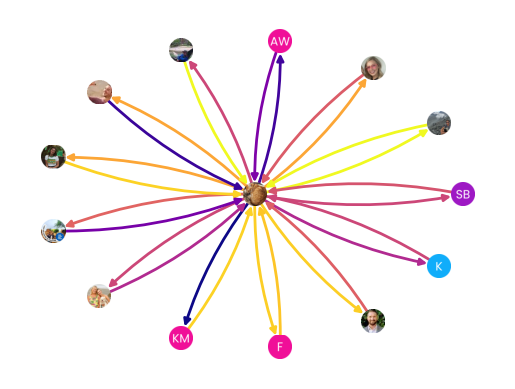

In [8]:
# League

from matplotlib import pyplot as plt
from PIL import Image, ImageDraw 
import matplotlib.image as mpimg
from matplotlib.pyplot import savefig

import networkx as nx
from PIL import Image 
import traceback
import pandas as pd

import xlsxwriter

images = {
    'ash' : 'ash',
    'tyler' : 'tyler',
    'steven' : 'sak',
    'eleni' : 'eleni',
    'chels' : 'chels',
    'hannah' : 'hannah',
    'flem' : 'flem',
    'watt' : 'watt',
    'wilk' : 'wilk',
    'kyvin' : 'kyvin',
    'george' : 'gus',
    'sam' : 'sam',
    'kayla' : 'kayla',
    'adam' : 'adam'
}

ignore_ids = ['625e5ceef80e4ccc9d76b55dcbb50204', '4e6be55af0ac4eefa1df0eb6f900041f']

class League:

    def __init__(self):
        self.peeps = read_peeps()
        self.rounds = read_rounds()
        self.subs = read_submissions(self.peeps)
        read_votes(self.peeps, self.subs)

        # Handle images
        for name, f_name in images.items():
            p = self.find_person(name)
            p.img = circular_img('assets/img/fotos/{}.png'.format(f_name))

    def find_person(self, name):
        candidates = [person for person in self.peeps.values() if name.lower() in person.name.lower()]
        if len(candidates) == 0:
            print('No one with the name "{}"'.format(name))
            return None
        elif len(candidates) > 1:
            print('"{}" not descriptive enough, found multiple people: {}'.format(name, candidates))
            return None
        else:
            return candidates[0]

    def display_pref_charts(self, both_dirs = True, imgs = False, saving = False):
        for peep in self.peeps.values():
            if peep.id not in ignore_ids:
                print('Displaying {}\'s chart'.format(peep.name))
                self.display_preference_chart(peep.name, both_dirs = both_dirs, imgs = imgs, saving = saving)

    def display_preference_chart(self, name, both_dirs = True, imgs = False, saving = False):
        p = self.find_person(name)

        G = nx.DiGraph()
        G.add_node(p.id, image=p.img, name=p.name)
        mx = p.mx()

            
        for oth_id, pts in p.votes.items():
            if oth_id not in ignore_ids:
                oth = self.peeps[oth_id]
                G.add_node(oth_id, image=oth.img, name=oth.name)
                G.add_edge(p.id, oth_id, weight=pts/mx)
                if both_dirs:
                    G.add_edge(oth_id, p.id, weight=oth.votes[p.id]/oth.mx())

        outer_nodes = set(G) - {p.id}
        pos = nx.circular_layout(G.subgraph(outer_nodes), scale=0.2)
        pos[p.id] = np.array([0, 0])  # manually specify middle position

        # nx.draw_networkx_labels(el_G, pos, font_size=8)

        edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
        edges2 = nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=weights, width=2.0, edge_cmap=plt.cm.plasma, connectionstyle="arc3,rad=0.1",
        arrowstyle='-|>')

        fig=plt.gcf()
        ax=plt.gca()
        if imgs:
            trans = ax.transData.transform
            trans2 = fig.transFigure.inverted().transform
            imsize = 0.05 # this is the image size
            for n in G.nodes():
                (x,y) = pos[n]
                xx,yy = trans((x,y)) # figure coordinates
                xa,ya = trans2((xx,yy)) # axes coordinates
                a = plt.axes([xa-imsize/2.0,ya-imsize/2.0, imsize, imsize ])
                try:
                    a.imshow(G.nodes[n]['image'])
                    a.set_aspect('equal')
                    a.axis('off')
                    # plt.colorbar(edges2)
                except TypeError as e:
                    print('error on {}'.format(self.peeps[n]))
                    traceback.print_exc()
                    a.axis('off')
        else:
            labels = {p.id : p.display_name() for p in self.peeps.values() if p.id not in ignore_ids}
            nx.draw_networkx_labels(G, pos, font_size=8,  labels = labels)
        ax.axis('off')

        if saving: fig.savefig('assets/img/{}_pref-chart.png'.format(p.display_name()), transparent=True, dpi=1000)
    
        plt.show()
        print()



    def save_to_excel(self):
        # row = 0
        # col = 0

        # Fix peeps to some ordering
        people = sorted(self.peeps)
        people = [p for p in people if p not in ignore_ids]
        # writer = pd.ExcelWriter('votes_waterfall.xlsx', engine='xlsxwriter')
        workbook = xlsxwriter.Workbook('votes.xlsx')
        worksheet = workbook.add_worksheet()

        # Write header row
        for col in range(1, len(people) + 1):
            worksheet.write(0, col, self.peeps[people[col -1]].name)
        
        # write header column
        for row in range(1, len(people) + 1):
            worksheet.write(row, 0, self.peeps[people[row -1]].name)


        cell_format = workbook.add_format()
        cell_format.set_bold()

        # Write people's prefs, keeping track of min/max
        min = 50
        max = -50
        for id_voter, voter in enumerate(people):
            for id_rec, receiver in enumerate(people):
                if id_voter != id_rec:
                    vote = self.peeps[voter].votes[receiver]
                    worksheet.write(id_voter + 1, id_rec + 1, vote, cell_format)
                    if vote < min: min = vote
                    elif vote > max : max = vote
                else: worksheet.write(id_voter + 1, id_rec + 1, '-')

        # for p in 
        worksheet.conditional_format(1, 1, len(people) + 1, len(people) + 1, 
                                     {'type': '3_color_scale',
                                    #   'criteria': '=AND(A1<=0,A1<>"")',
                                    #   'min_color': "blue",
                                    #   'mid_color': "orange",
                                    #   'max_color': "yellow",
                                    #   'mid_type': "num",
                                    #   'minimum' : min,
                                    #   'maximum' : max,
                                      }
                                      )
        workbook.close()
        # writer.close()

liga = League()
liga.display_pref_charts(imgs=True, saving = True)
# liga.save_to_excel()

In [31]:
# print out songs
sak = liga.find_person('steven')
print(sak.submissions)

defaultdict(<class 'list'>, {'edd1f5115fd44739bf8e773b19586e1d': ['spotify:track:0hUUCxji9cN0gb8Twf0a0n', 'spotify:track:1bKOcc2DsgU2BCmdgPjNmU'], '4de5d3c13914497c8bfc85b5cfcf18ec': ['spotify:track:2fE1hcjUxlLxXrZusTEJlq', 'spotify:track:3avYqdwHKEq8beXbeWCKqJ'], 'b39eadce4e684b0dbf322a9ece70e377': ['spotify:track:2sC2P3BN0IXujNaaSyDmtP', 'spotify:track:6d9IiDcFxtFVIvt9pCqyGH'], 'ce5f7e72fdcc4e3ba92bcabc78f44e2d': ['spotify:track:4xQMFoD33vx6stB1UzfA6s', 'spotify:track:5nFxn6JRTRISJNHF52pXPF'], '358b074bc0ba444f8542049135504705': ['spotify:track:11aFVmFy8903RwDx4ohQiq', 'spotify:track:78Gzxi27GuNHTfkn2BylG4'], '070a35e5ad9d4491ad0691f4f8641ab5': ['spotify:track:2I0Q1wxFRdnDYtG6Q8W47S', 'spotify:track:7vITd7ck8l9Ww62BWpIhTY'], '90285f9a21d0428ab5dfe7f4cb1bc295': ['spotify:track:4KacUpvbA3Mfo05gttTjhN', 'spotify:track:5AwS3yu3w9BT2eHBMnFDLc'], '47a5afeee0314bf88f452eab7f7c5eca': ['spotify:track:0COqiPhxzoWICwFCS4eZcp', 'spotify:track:7eRU0RltchvgOTSbX6vmdv'], 'afdba24cd5ab4f249602c5b246

In [36]:
# Generate person's report

for other in liga.peeps.values():
    if other != sak:
        print('{} stats: Total votes: {}, total downvotes: {}'.format(other.name, sak.votes[other.id], sak.downvotes[other.id]))

Luke stats: Total votes: 0, total downvotes: 0
Samuel basic stats: Total votes: 5, total downvotes: 2
Alex Glennon stats: Total votes: 0, total downvotes: 0
Adam Burger stats: Total votes: 10, total downvotes: 2
Ashley Berset stats: Total votes: 8, total downvotes: 1
Andrew Watt stats: Total votes: 1, total downvotes: 3
George Harrison stats: Total votes: 5, total downvotes: 1
Tyler John stats: Total votes: 8, total downvotes: 1
Eleni Murphy stats: Total votes: 8, total downvotes: 1
Chelsea Kline stats: Total votes: 6, total downvotes: 1
Hannah Rose stats: Total votes: 5, total downvotes: 3
Kayla Marie stats: Total votes: 0, total downvotes: 4
flemstone stats: Total votes: 9, total downvotes: 0
Andrew Wilkinson stats: Total votes: 9, total downvotes: 1
kyvin stats: Total votes: 4, total downvotes: 0


In [25]:
# Find the biggest difference
biggest_diff = 0
voter = None
receiver = None
for p1 in liga.peeps.values():
    p1_lover = None
    p1_hater = None
    for p2 in liga.peeps.values():
        if p1 != p2:
            vote_diff = p1.votes[p2.id] - p2.votes[p1.id]
            if abs(vote_diff) > biggest_diff:
                biggest_diff = abs(vote_diff)
                if vote_diff < 0:
                    voter = p2
                    receiver = p1
                else:
                    voter = p1
                    receiver = p2

print('Biggest diff is between {} and {} and is {} big'.format(voter, receiver, biggest_diff))

KeyboardInterrupt: 

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy import util
import os

# spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())
os.environ['SPOTIPY_CLIENT_ID'] = '7de5e8acc2b144e4bab4e423779fbcbe'
os.environ['SPOTIPY_CLIENT_SECRET'] = '13be3c4f307c44a588854f9dd78fbe8a'
os.environ['SPOTIPY_REDIRECT_URI'] = 'http://www.example.com'
scope = 'playlist-modify-public playlist-modify-private ugc-image-upload'
email = 'stevenkordonowy1991@gmail.com'
token = util.prompt_for_user_token(scope=scope, username=email)
sp = spotipy.Spotify(auth=token)

album_names = ['red', 'midnights', 'taylor swift', 'lover']

def taylor_round():
    taylor_rd = [rd for rd in rounds.values() if 'Era'  in rd.name][0]
    albums = defaultdict(int)
    songs = sp.tracks(subs[taylor_rd.id])
    for song in songs['tracks']:
        # print('Album: {}'.format(spotty_song['album']['name']))
        if 
        albums[song['album']['name']] += 1
        # albums = results['items']
        # while results['next']:
        #     results = spotipy.next(results)
        #     albums.extend(results['items'])

        # for album in albums:
        #     print(album['name'])

    # print(taylor_songs)
    for album, ct in albums.items():
        print('{}: {}'.format(album, ct))
taylor_round()

SyntaxError: invalid syntax (1374505503.py, line 23)

In [103]:
from PIL import Image, ImageDraw 
  
import webp
ash_img = Image.open("fotos/ash.webp") 


for peep in peeps.values():
    if peep.id not in ignorelist:
        print('Running for {}'.format(peep.name))
        display_preference_chart(peep.name, True)

# sak_img = circular_img('fotos/sak.png')
# display(Image.fromarray((sak_img * 255).astype(np.uint8)))

NameError: name 'ignorelist' is not defined